In [1]:
from pymopt.voxel import VoxelDicomModel

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import datetime
_today = datetime.datetime.now().strftime('%y%m%d')

In [2]:
dicom_path = 'D:/DICOMfile4'
save_path = '../result/'+_today+'_dicom4skin20Cair_binary'
coment = 'change air'
print(save_path)

params = {
    'th_skin':2,'th_ct':0.3,
    'n_sp':1.,'n_tr':1.37,'n_ct':1.37,'n_skin':1.37,'n_air':1.,
    'ma_sp':1e-8,'ma_tr':0.0173,'ma_ct':0.0173,'ma_skin':0.0979,
    'ms_sp':1e-8,'ms_tr':16.7825,'ms_ct':16.7825,'ms_skin':12.7119,
    'g_sp':0.9,'g_tr':0.9375,'g_ct':0.9375,'g_skin':0.9,
    }

monte_params = {
    'nPh':10**7,
    'model_type':'binary',#'liner',
    'd_beam':0,#0.54,
    'fluence_mode':'3D',
    'nr':100,'nz':250,'dr':0.1,'dz':0.1,   
}

../result/201011_dicom4skin20Cair_binary


In [3]:
dcm = VoxelDicomModel()
dcm.import_dicom(dicom_path)

ConstPixelDims: (1024, 1024, 1098)
ConstPixelSpacing: (0.02770302090982, 0.02770302090982, 0.02770302090982)
Data infomation
(0008, 0005) Specific Character Set              CS: ['', 'ISO 2022 IR 87']
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.392.200036.9110..1.1.201701261928380820
(0008, 0020) Study Date                          DA: '20170126'
(0008, 0021) Series Date                         DA: '20170126'
(0008, 0022) Acquisition Date                    DA: '20170126'
(0008, 0023) Content Date                        DA: '20170126'
(0008, 0030) Study Time                          TM: '191630.0000'
(0008, 0031) Series Time                         TM: '191630.0000'
(0008, 0032) Acquisition Time                    TM: '191630.0000'
(0008, 0033) Content Time                        TM: '192838.0820'
(0008, 0050) Accession

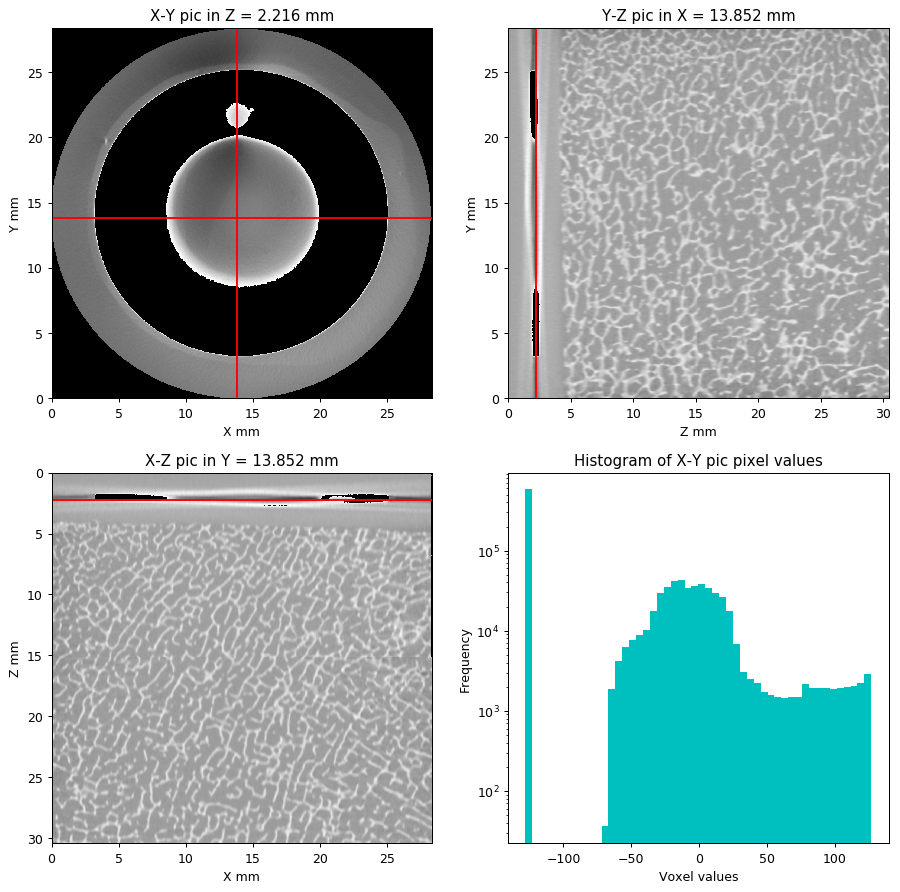

In [4]:
dcm.rot180_y()
dcm.display_cross_section(xx = 500,yy = 500,zz = 80,graph_type = 'ALL',cmap = 'gray')

Trimming parameters
              right left upper lower    top bottom
Pixel number      0    0     0     0    173      0
Position [mm]     0    0     0     0  4.793      0


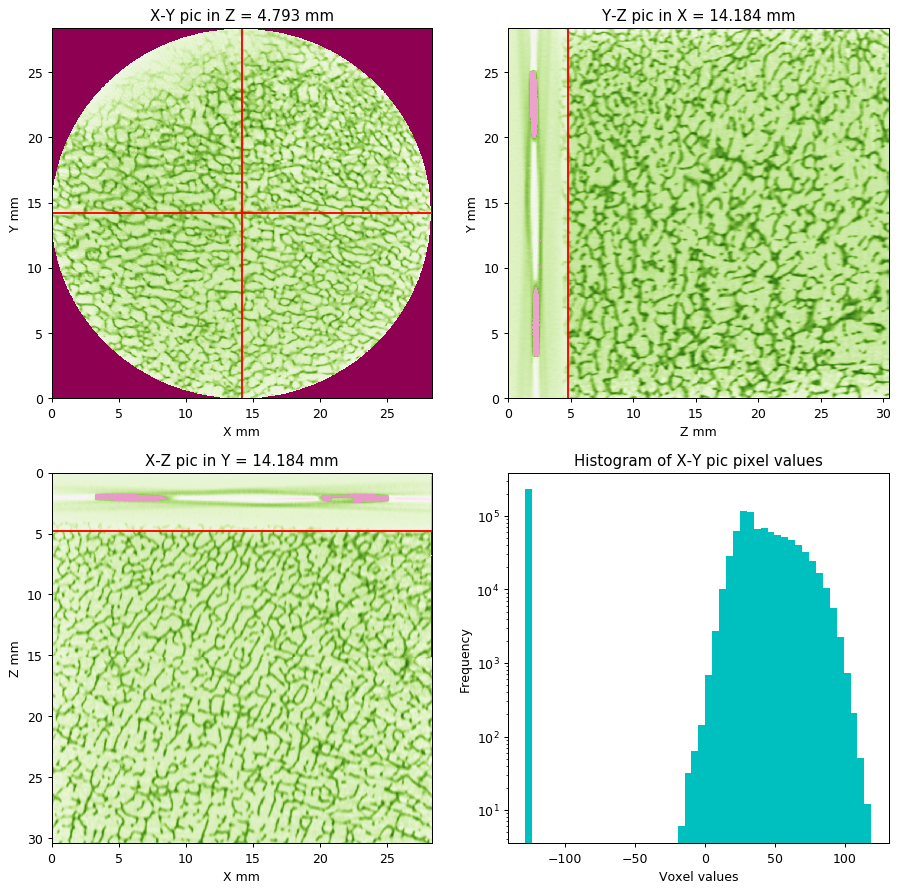

In [5]:
trim_params = {
    'int_pix':False,
    'right': 0, 
    'left': 0,
    'upper': 0,
    'lower':0,
    'top':4.8,
    'bottom':0,
    'cmap':'PiYG',
}
dcm.trim_area(**trim_params)

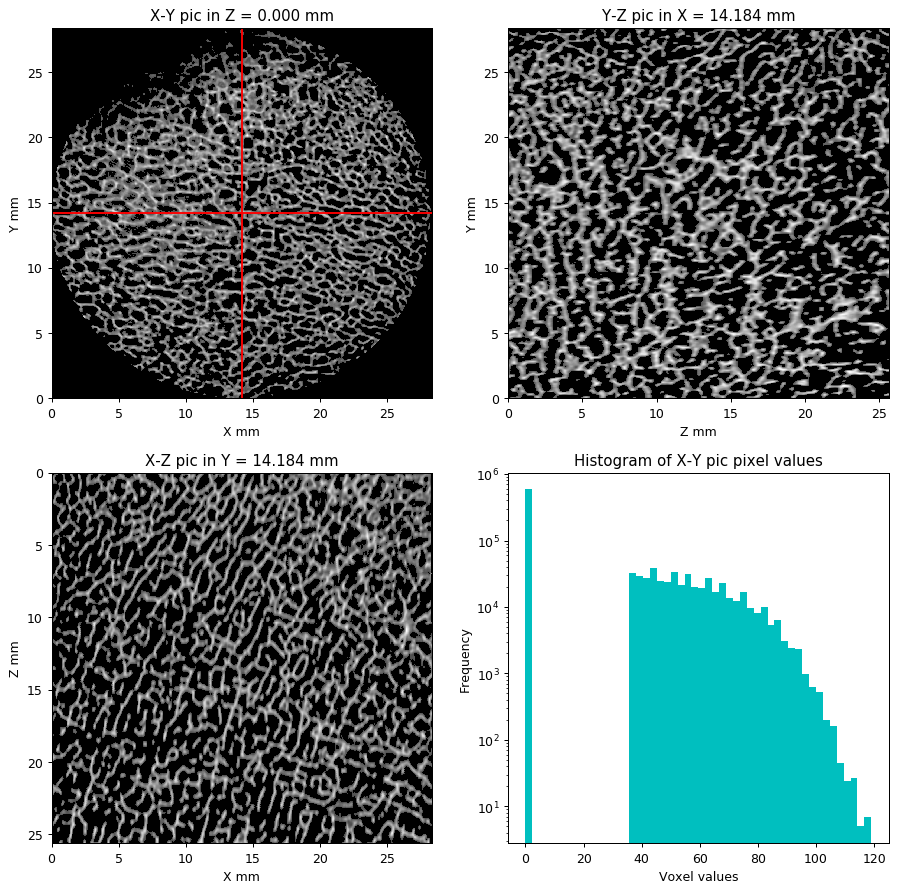

#########  Size  #########
* Image shape was changed
  from (1024,1024,1098)
  to   (1024,1024,925)

* Memory area size for
  voxel storage was changed
  from 1151.336 Mbyte
  to   969.933 Mbyte


In [6]:
dcm.set_trim(cmap = 'gray')

In [7]:

dcm.set_params(params)
dcm.model.get_params()

,sp,tr,ct,skin,air
n,1.000000e+00,1.3700,1.3700,1.3700,1.0
ma,1.000000e-08,0.0173,0.0173,0.0979,0.0
ms,1.000000e-08,16.7825,16.7825,12.7119,0.0
g,9.000000e-01,0.9375,0.9375,0.9000,0.0
th,0.000000e+00,0.0000,0.3000,2.0000,0.0


In [8]:

dcm.set_monte_params(**monte_params)

Memory area size for fluence storage: 40 Mbyte


In [9]:
dcm.build()

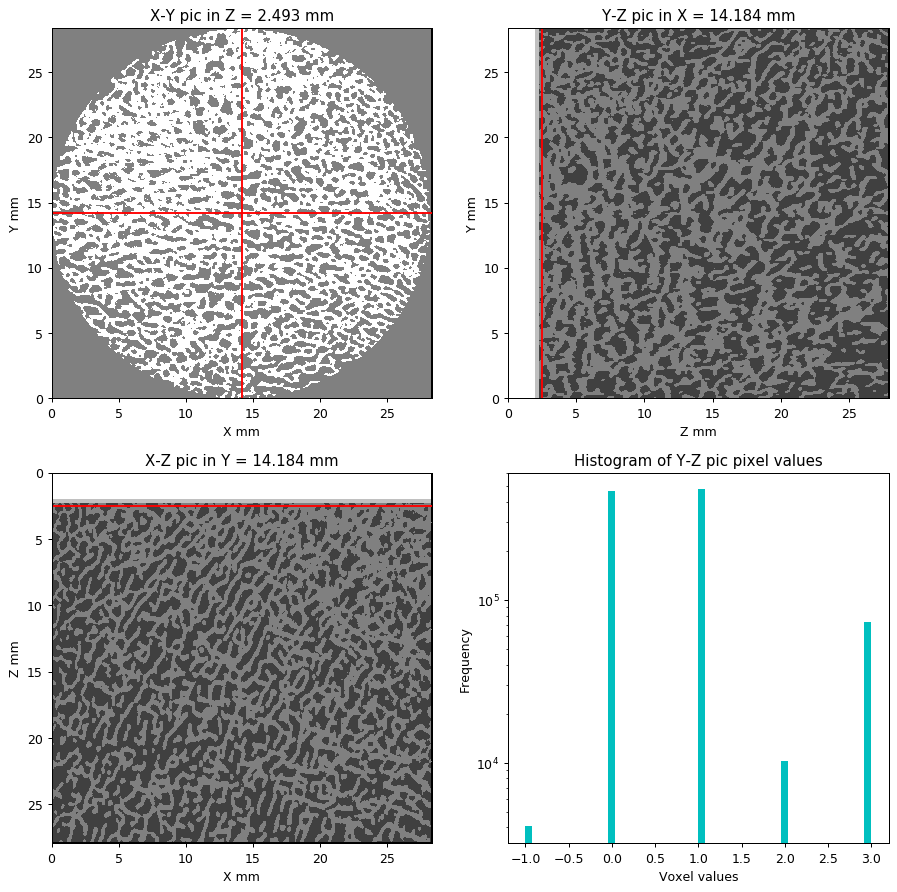

In [10]:
dcm.display_cross_section(image = dcm.model.voxel_model,
                          xx = 512,yy = 512,zz = 90,
                          cmap = 'gray',hist_type = 'YZ')

In [11]:
dcm.start()


###### Start ######

Progress: 0.207 [％]
Calculation time: 1 minutes 10.373 seconds.

Progress: 0.701 [％]
Calculation time: 2 minutes 44.077 seconds.

Progress: 1.995 [％]
Calculation time: 6 minutes 10.145 seconds.

Progress: 5.452 [％]
Calculation time: 13 minutes 49.299 seconds.

Progress: 13.126 [％]
Calculation time: 28 minutes 7.973 seconds.

Progress: 23.971 [％]
Calculation time: 54 minutes 11.278 seconds.

Progress: 36.626 [％]
Calculation time: 1 h 39.000 minutes.

Progress: 50.587 [％]
Calculation time: 2 h 52.000 minutes.

Progress: 64.223 [％]
Calculation time: 4 h 45.000 minutes.

Progress: 76.923 [％]
Calculation time: 7 h 27.000 minutes.

Progress: 89.005 [％]
Calculation time: 10 h 40.000 minutes.

Progress: 97.359 [％]
Calculation time: 13 h 9.000 minutes.

Progress: 99.946 [％]
Calculation time: 14 h 5.000 minutes.


###### Finish ######
Maximum step number: 13242
######
Mean Rd 0.321503
Mean Tt 0.004105

Calculation time: 14 h 21.000 minutes.


In [12]:
dcm.save_result(save_path,coment)

Monte Carlo results saved in 
-> ../result/201011_dicom4skin20Cair_binary_LID.pkl.bz2

Calculation conditions are saved in
-> ../result/201011_dicom4skin20Cair_binary_info.json

Internal Fluence saved in 
-> ../result/201011_dicom4skin20Cair_binary_fluence3D.pkl.bz2

Calculation time: 0 minutes 42.167 seconds.


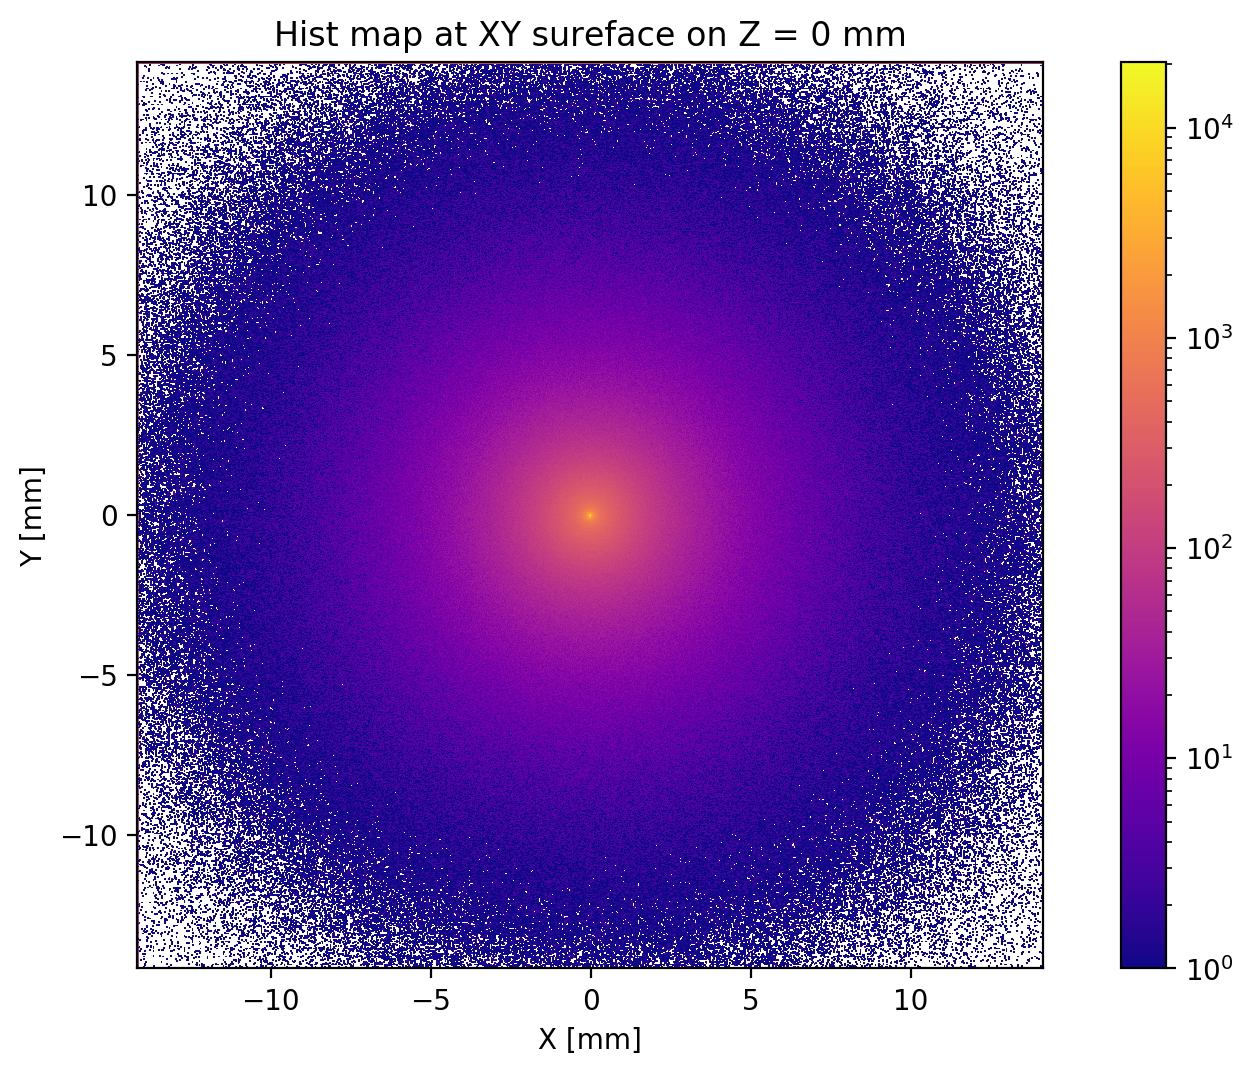

In [13]:
dcm.display_histmap()

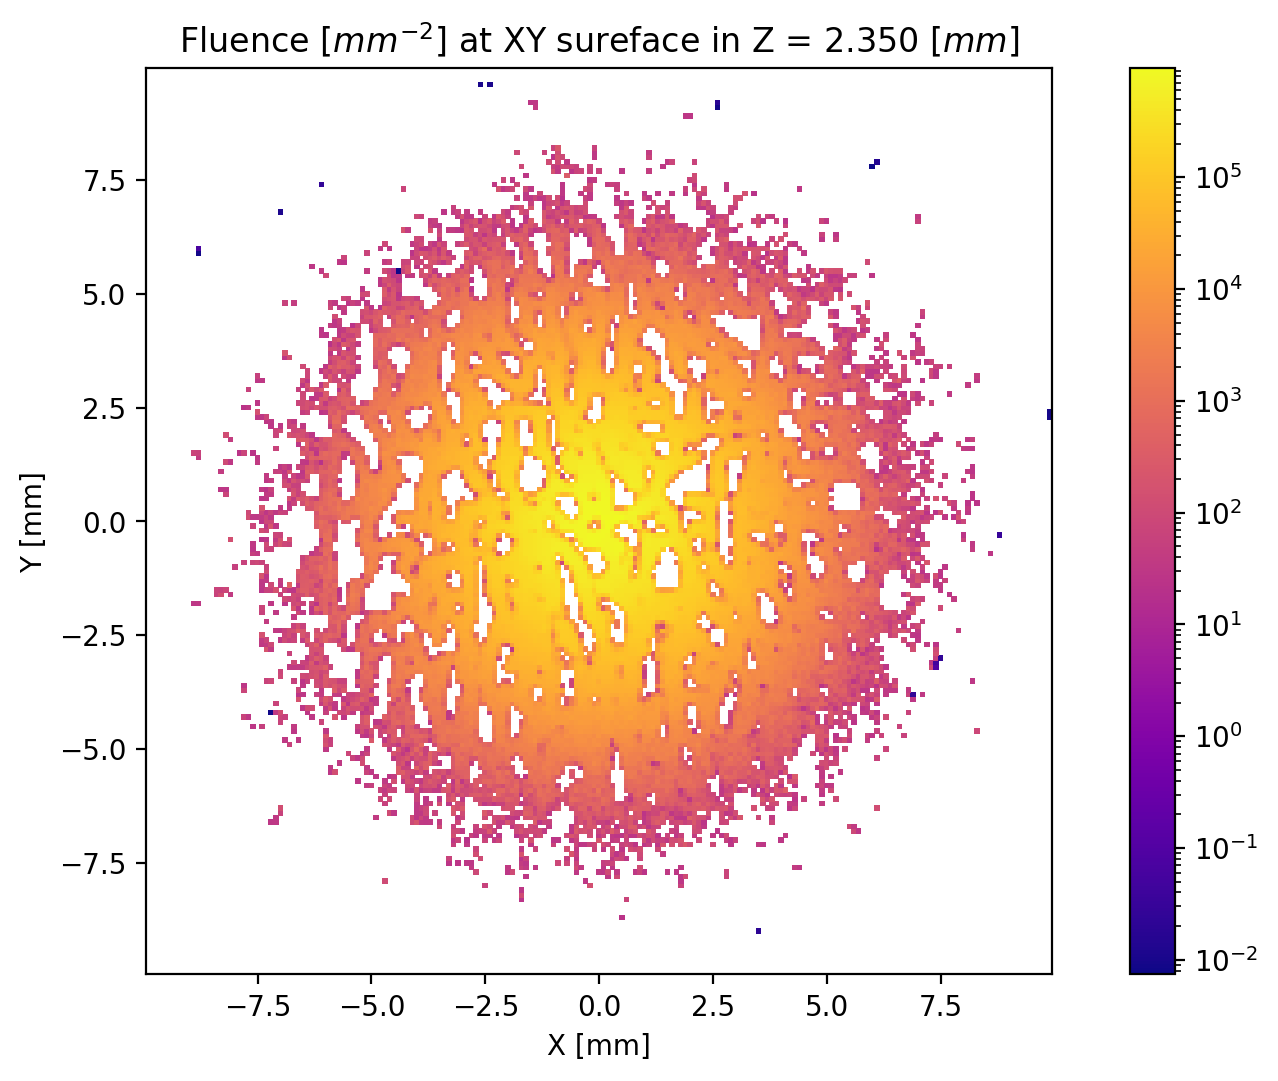

In [14]:

fl = dcm.get_fluence()
fig = plt.figure(figsize=(10,6),dpi=200)
ax = fig.add_subplot(111)
ax.set_aspect('equal')

plt.set_cmap(plt.get_cmap("plasma"))
H = ax.pcolormesh(fl['r'],fl['r'],fl["Arz"][:,:,23].T,norm=colors.LogNorm())
ax.set_title('Fluence $[mm^{-2}]$ at XY sureface in Z = %0.3f $[mm]$' %(fl['z'][23]))
ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
fig.colorbar(H,ax=ax)
plt.show()
plt.show()


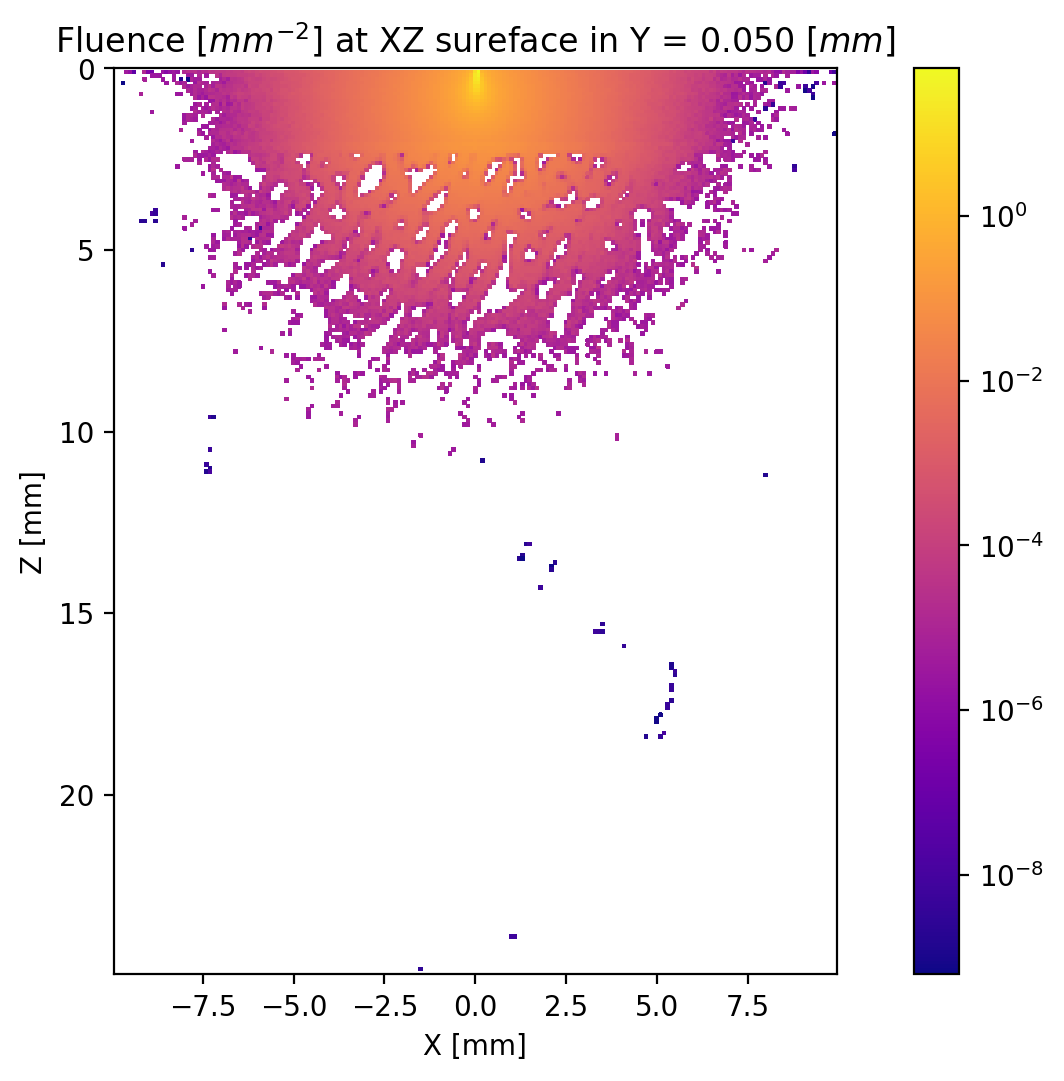

In [15]:
fig = plt.figure(figsize=(10,6),dpi=200)
ax = fig.add_subplot(111)
ax.set_aspect('equal')

plt.set_cmap(plt.get_cmap("plasma"))
H = ax.pcolormesh(fl['r'],fl['z'],fl["Arz"][:,100,:].T/10**7,norm=colors.LogNorm())
ax.set_title('Fluence $[mm^{-2}]$ at XZ sureface in Y = %0.3f $[mm]$' %(fl['r'][100]))
ax.set_ylim(fl['z'].max(),0)
ax.set_xlabel('X [mm]')
ax.set_ylabel('Z [mm]')
fig.colorbar(H,ax=ax)
plt.show()
plt.show()

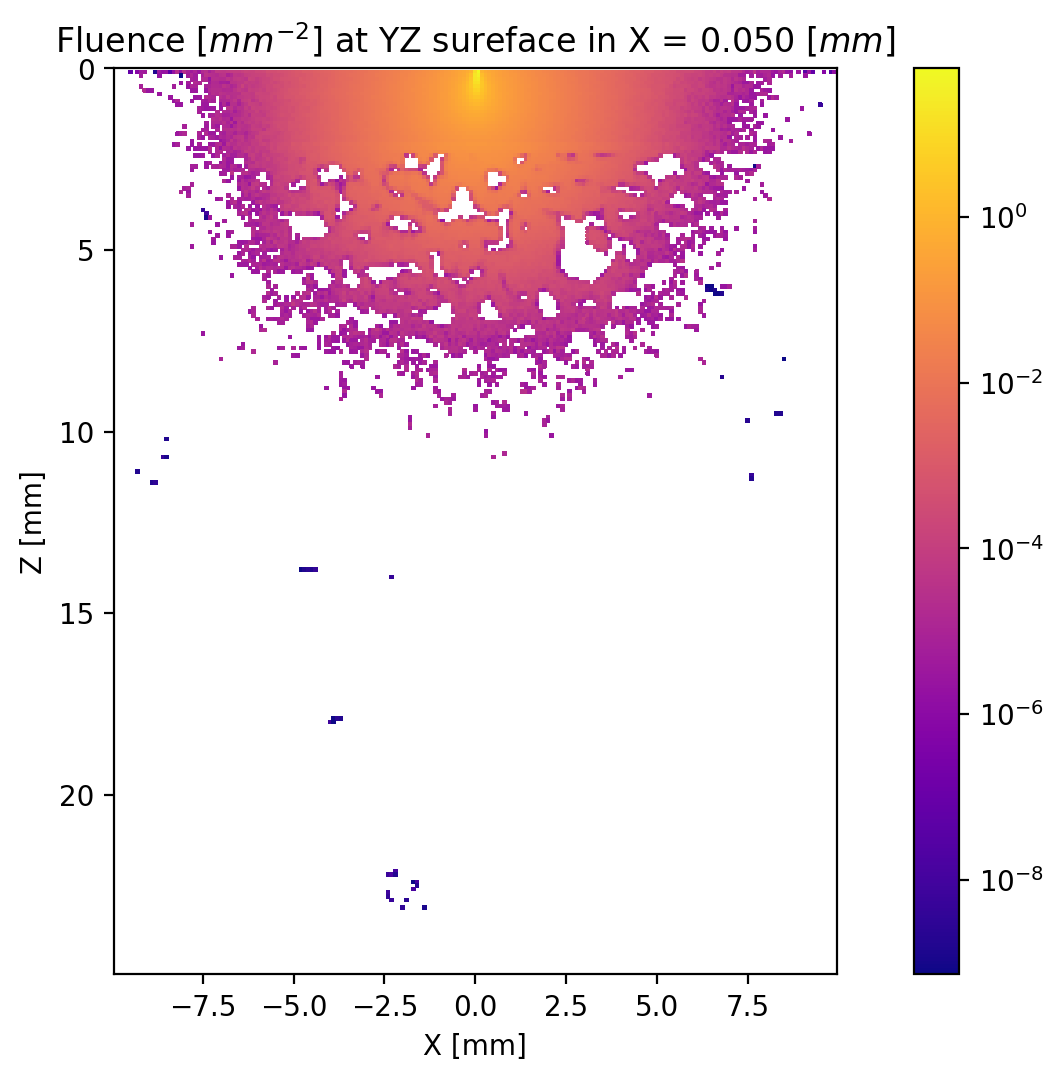

In [16]:
fig = plt.figure(figsize=(10,6),dpi=200)
ax = fig.add_subplot(111)
ax.set_aspect('equal')

plt.set_cmap(plt.get_cmap("plasma"))
H = ax.pcolormesh(fl['r'],fl['z'],fl["Arz"][100,:,:].T/10**7,norm=colors.LogNorm())
ax.set_title('Fluence $[mm^{-2}]$ at YZ sureface in X = %0.3f $[mm]$' %(fl['r'][100]))
ax.set_ylim(fl['z'].max(),0)
ax.set_xlabel('X [mm]')
ax.set_ylabel('Z [mm]')
fig.colorbar(H,ax=ax)
plt.show()
plt.show()

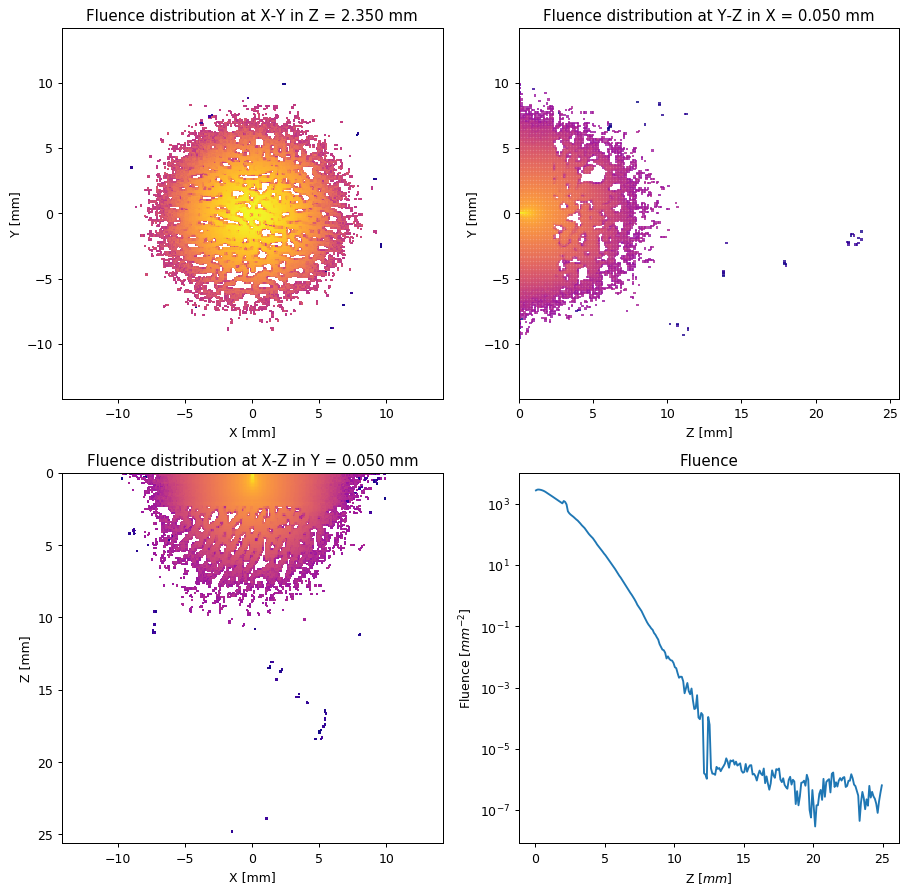

In [17]:

lhx = dcm.model.model_shape[0]*dcm.ConstPixelSpacing[0]/2
lhy = dcm.model.model_shape[1]*dcm.ConstPixelSpacing[1]/2
lz = dcm.model.model_shape[2]*dcm.ConstPixelSpacing[2]
Az2d = np.zeros(fl["z"].size)
for zz in range(fl["z"].shape[0]):
    Az2d[zz] = fl["Arz"][:,:,zz].sum()

fig,ax = plt.subplots(2,2,figsize=[12,12],dpi=90)
plt.set_cmap(plt.get_cmap("plasma"))
ax[0,0].pcolormesh(fl['r'],fl['r'],fl["Arz"][:,:,23]/10**7,norm=colors.LogNorm())
ax[0,0].set_xlim(-lhx,lhx)
ax[0,0].set_ylim(-lhy,lhy)
ax[0,0].set_title('Fluence distribution at X-Y in Z = %0.3f mm' %(fl['z'][23]))
ax[0,0].set_xlabel('X [mm]')
ax[0,0].set_ylabel('Y [mm]')

H = ax[0,1].pcolormesh(fl['z'],fl['r'],fl["Arz"][100,:,:]/10**7,norm=colors.LogNorm(),alpha = 0.8)
ax[0,1].set_title('Fluence distribution at Y-Z in X = %0.3f mm' %(fl['r'][100]))
ax[0,1].set_xlim(0,lz)
ax[0,1].set_ylim(-lhy,lhy)
ax[0,1].set_xlabel('Z [mm]')
ax[0,1].set_ylabel('Y [mm]')
#fig.colorbar(H,ax=ax[0,1])
ax[1,0].pcolormesh(fl['r'],fl['z'],fl["Arz"][:,100,:].T/10**7,norm=colors.LogNorm())
ax[1,0].set_title('Fluence distribution at X-Z in Y = %0.3f mm' %(fl['r'][100]))
ax[1,0].set_ylim(lz,0)
ax[1,0].set_xlim(-lhx,lhx)
ax[1,0].set_xlabel('X [mm]')
ax[1,0].set_ylabel('Z [mm]')
ax[1,1].plot(fl["z"],Az2d/(0.1*10**7))
ax[1,1].set_title('Fluence')
ax[1,1].set_yscale('log')
ax[1,1].set_xlabel("Z $[mm]$")
ax[1,1].set_ylabel("Fluence $[mm^{-2}]$")
plt.show()

